# Basic SLR Design Tutorial

This tutorial runs through a couple of simple examples using the Python/Numpy SLR toolbox to design and simulate SLR RF pulses.

The first step is to import the needed packages.  You will need to build the slr module by compiling the C++ code in the GitHub repository.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import slr

sliceThickness = 5.
z = np.linspace(-3*sliceThickness,3*sliceThickness,400)
numberPoints = 400


## Simple Spin Echo Pulse
This cell sets up the spin echo pulse.  The specs of the pulse are TBW=3.55, pulse duration of 3.1ms, and with a flip angle of 160 degrees.  

This pulse is designed using a least squares filter, though other options do exist.

In [3]:
tbwSLR = 3.55
durationSLR = 3.1
rfSLR = slr.slr("se",numberPoints,tbwSLR,durationSLR,flipAngle=160,filterType="ls")
rfSLR.GenerateRF()
rfScaledSLR = rfSLR.GetRFScaled()
mxySLR = rfSLR.Simulate(sliceThickness,z)
timeSLR = np.linspace(0,durationSLR,numberPoints)

We can do the same for a small tip pulse as well.  This pulse has the same specs as the least-squares pulse, though the time is shorter because it has lower peak B1.

In [4]:
tbwMsinc = 3.55
durationMsinc = 1.2
rfMsinc = slr.slr("smalltip",numberPoints,tbwMsinc,durationMsinc,flipAngle=160.)
rfMsinc.GenerateRF()
rfScaledMsinc = rfMsinc.GetRFScaled()
mxyMsinc = rfMsinc.Simulate(sliceThickness,z,simulationType="se")
timeMsinc = np.linspace(0,durationMsinc,numberPoints)

And finally we can add one more pulse:  a minimum phase spin echo pulse.  Similar specs as above, though the timing is different to match max B1.

In [5]:
tbwMP = 3.55
durationMP = 3.1
rfMP = slr.slr("se",numberPoints,tbwMP,durationMP,flipAngle=160.,filterType="min")
rfMP.GenerateRF()
rfScaledMP = rfMP.GetRFScaled()
mxyMP = rfMP.Simulate(sliceThickness,z,simulationType="se")
timeMP = np.linspace(0,durationMP,numberPoints)

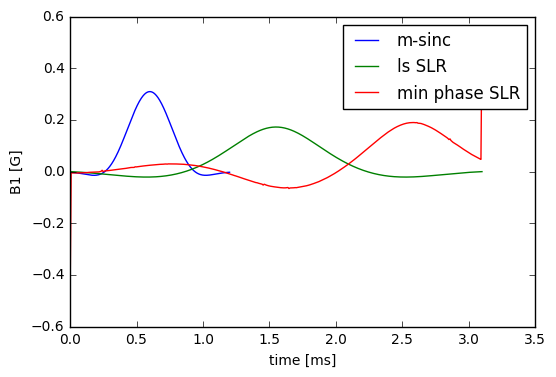

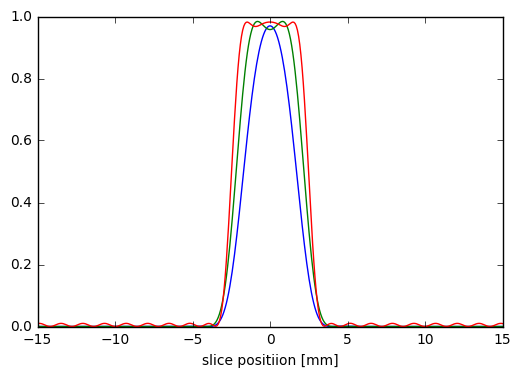

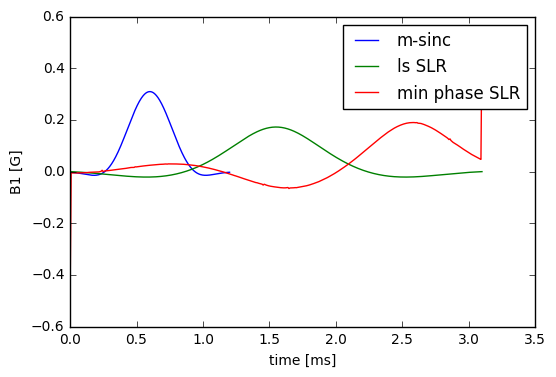

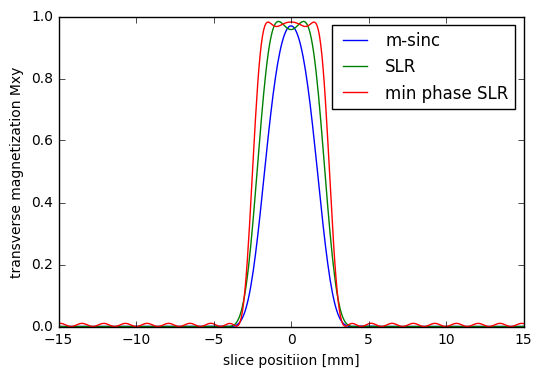

In [8]:
plt.figure()
p1, = plt.plot(timeMsinc,rfScaledMsinc.real)
p2, = plt.plot(timeSLR,rfScaledSLR.real)
p3, = plt.plot(timeMP,rfScaledMP.real)
plt.xlabel("time [ms]")
plt.ylabel("B1 [G]")
plt.legend([p1,p2,p3],["m-sinc","ls SLR","min phase SLR"])

plt.figure()
p1, = plt.plot(z,abs(mxyMsinc))
p2, = plt.plot(z,abs(mxySLR))
p3, = plt.plot(z,abs(mxyMP))
plt.xlabel("slice positiion [mm]")
plt.ylabel("transverse magnetization Mxy")
plt.legend([p1,p2,p3],["m-sinc","SLR","min phase SLR"])
plt.show()